In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact, widgets, FloatSlider, IntSlider, Checkbox, Layout, Dropdown, Output, VBox, HBox, Button
# import networkx as nx
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

from numpy import sin, cos, exp, pi, linspace, arange, meshgrid

%matplotlib widget

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

plt.rcParams.update({
    "figure.figsize": (6, 6),
    "text.usetex": True,
    "font.family": "serif",
})

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$

In [2]:
%%html
<style>
    li.thm {
        margin: 10px 0;
    }
    .shadow {
        /*Edit or add new attributes, change size, color, etc */
        width: 75%;
        box-shadow: 8px 8px 10px #444;
        border: 1px solid silver;

        /*For positioning in a jupyter notebook*/
        margin-top: 2em;
        position: relative;
        top: -25px
    }

    ol li {
        padding: .5em;
    }
</style>

<div style="padding-bottom: 40%"></div>

Welcome to APMA E2000

<img src="../img/taco.gif" width="50%" style="float:right" />

# Multivariable Calculus for Engineers and Applied Scientists

Drew Youngren
<code>dcy2@columbia.edu</code>

<p style="padding-bottom:40%;"> </p>

  # What is calculus?
  
  In the first two semesters of calculus, the object of study are functions from the real numbers to the real numbers.
  
  $$f: \RR \to \RR$$

In [33]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    button = Button(description="Another one")
    
    dt = 1/100
    xs = np.arange(0,1,dt)
    ys = np.zeros(100)
    vel = np.random.random() - 1/2
    acc = np.random.random()*4 - 2
    for i in range(1,len(ys)):
        ys[i] = ys[i-1] + vel * dt + acc * dt**2/2

        vel += acc * dt
        if i % 20 == 0:
            acc = - np.sign(acc)*np.random.random()*4

    ax.set_xlabel("$x$",fontsize=18)
    ax.set_ylabel("$y$",fontsize=18)

    p = ax.plot(xs,ys)[0]
    ax.set_ylim([-.4, .4])
    def gogo(b):
        ys = np.zeros(100)
        vel = 0
        acc = np.random.random()*4 - 2
        for i in range(1,len(ys)):
            ys[i] = ys[i-1] + vel * dt + acc * dt**2/2

            vel += acc * dt
            if i % 20 == 0:
                acc = - np.sign(acc)*np.random.random()*4
        p.set_data(xs, ys)
        
    button.on_click(gogo)
    
    return VBox([button, fig.canvas])

a("A Function")

<div style="padding-bottom: 40%"></div>

# What is multivariable calculus?

In multivariable calculus, we'll expand this study in three ways:

  - Vector-valued functions (curves) $$f:\RR \to \RR^n$$

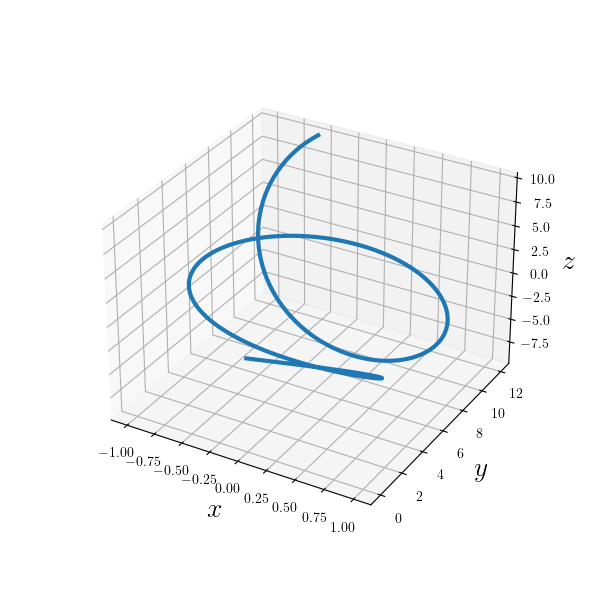

In [4]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    ax = fig.add_subplot(projection="3d")
    plt.ion()
    
    t = np.linspace(0,12,200)
    ax.plot(np.sin(t),t,t*np.cos(t), lw=3);
    for c in "xyz":
        getattr(ax, f"set_{c}label")(f"${c}$", fontsize=20)
    
    return fig.canvas

a("A Curve")

  <div style="padding-bottom: 40%"></div>

  - Functions of several variables (scalar fields) $$f:\RR^n \to \RR$$

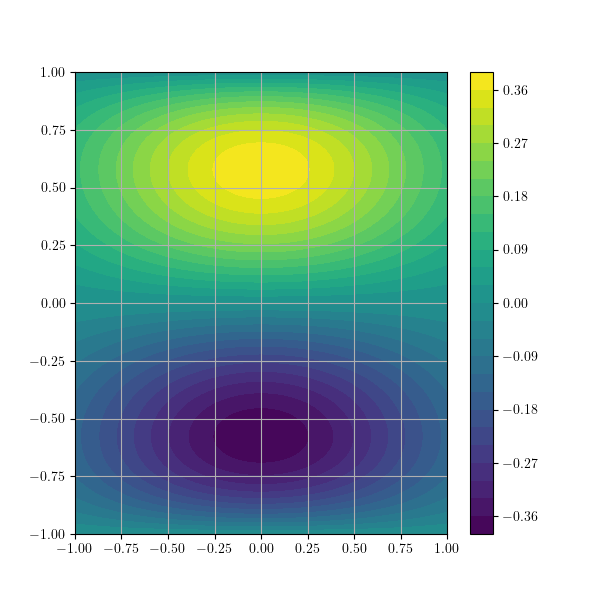

In [5]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    x = y = np.linspace(-1,1,200)
    x, y = np.meshgrid(x,y)
    cf = ax.contourf(x,y,(y - y**3)*np.exp(-x**2), levels=25)
    fig.colorbar(cf);
    ax.grid(True)
    
    return fig.canvas

a("A Scalar Field")

  <div style="padding-bottom: 40%"></div>

  - Vector fields $$f:\RR^n \to \RR^n$$

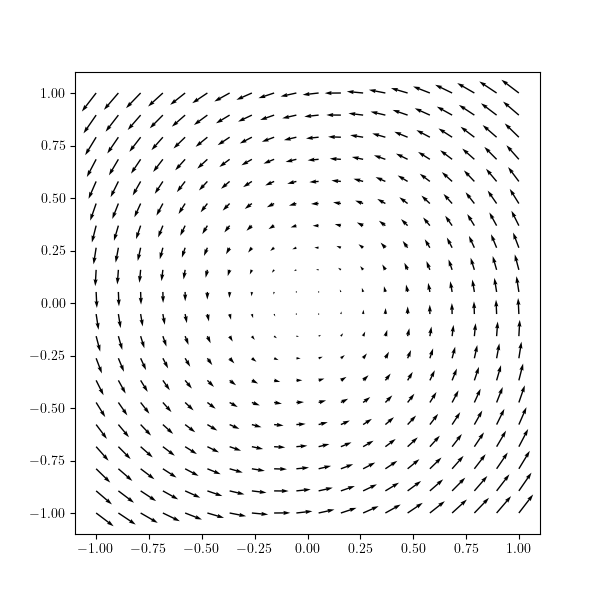

In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    x = y = np.linspace(-1,1,20)
    x, y = np.meshgrid(x, y)

    ax.quiver(x, y, -y - x/10, x - y/6);
    
    return fig.canvas

a("A Vector Field")

<p style="padding-bottom:40%;"> </p>

<h2>What is $\RR^n$?</h2> 

$$ \RR = \RR^1 = \text{ the real numbers}$$

$$\RR^2 = \{ (x,y): x,y \in \RR \} = \text{ the Cartesian plane}$$

$$\RR^3 = \{ (x,y,z): x,y,z \in \RR \} = \text{ 3-space}$$

$$\dots$$ $$ \RR^n = n\text{-space}$$

<div style="padding-bottom: 40%"></div>

<div class="alert alert-block alert-info shadow"> 
<strong>Definition</strong>
    
<p>A <strong>locus</strong> is a set of points in space determined by some condition. They are oftern solution sets to systems of equations.</p>
</div>

### Examples

  1. $z = 0$
  1. $x = 0$
  1. $y = 0$
  1. $x + y = 0$

In [7]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    ax = fig.add_subplot(projection="3d")
    plt.ion()
    
    example={1 : {"str": "$xy$-plane", "basis" : ((1,0,0),(0,1,0))}, 
               2 : {"str": "$yz$-plane", "basis" : ((0,1,0),(0,0,1))}, 
               3 : {"str": "$xz$-plane", "basis" : ((1,0,0),(0,0,1))}, 
               4 : {"str": "$x + y = 0$", "basis" : ((1,-1,0),(0,0,1))}   }
    drop = Dropdown(options=[
        ("xy-plane", ((1,0,0),(0,1,0))),
        ("yz-plane", ((0,1,0),(0,0,1))),
        ("xz-plane", ((1,0,0),(0,0,1))),
        ("x + y = 0", ((1,-1,0),(0,0,1)))
    ])
    
    # Make data.
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    # R = np.sqrt(X**2 + Y**2)
    #     Z = -3*X

    for c in "xyz":
        getattr(ax,f"set_{c}label")(f"${c}$", fontsize=20)
        getattr(ax,f"set_{c}lim")(-5,5)


    ax.plot([-5,5],[0,0],[0,0],'k',lw=4)
    ax.plot([0,0],[-5,5],[0,0],'k',lw=4)
    ax.plot([0,0],[0,0],[-5,5],'k',lw=4)    

    surf = ax.plot_surface(X, Y, 0*X, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True,alpha=.8);
    for c in "xyz":
        getattr(ax, f"set_{c}label")(f"${c}$", fontsize=20)
        
    def update(change):
        u,v = drop.value
        ax.collections.pop()
        ax.plot_surface(X * u[0] + Y*v[0] , X * u[1] + Y*v[1] , X * u[2] + Y*v[2] , cmap=cm.coolwarm,
                       linewidth=0, antialiased=True,alpha=.8);
    
    drop.observe(update, names='value')
    
    return VBox([drop, fig.canvas])

a("Loci")

<div style="padding-bottom: 40%"></div>

## Exercise

We will regularly use Poll Everywhere for in-class surveys/exercises/check-ins. 
The link will always be at [https://pollev.com/dcy2](https://pollev.com/dcy2).

In [18]:


IFrame("https://embed.polleverywhere.com/multiple_choice_polls/MczZpgJENlapeG4Cobbsc?controls=none&short_poll=true", width=800, height=600)

<div style="padding-bottom: 40%"></div>

## Distance

The formula for the distance between two points $(p_1,...,p_n)$ and $(q_1,...,q_n)$ in $\RR^n$ is trivial if you just remember the Pythagorean Theorem.

$$d = \sqrt{\sum_{i=1}^n (p_i - q_i)^2}$$

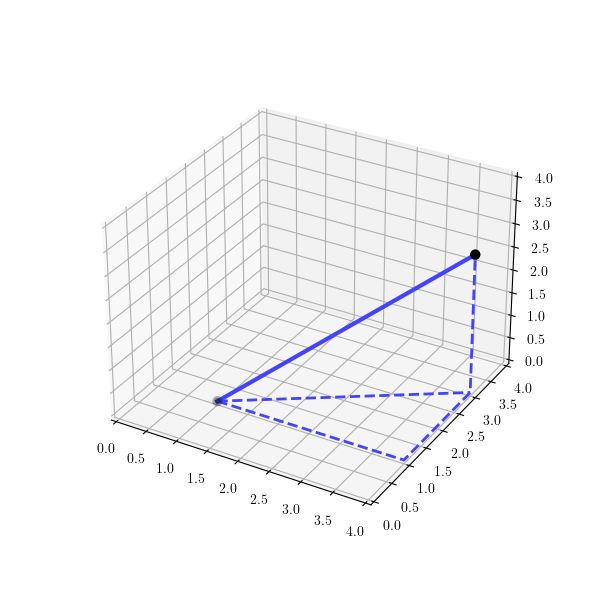

In [9]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    ax = fig.add_subplot(projection="3d")
    plt.ion()
    
    ax.plot([1,4],[1,3],[0,3],lw=3,color='#4444ff')
    ax.plot([1,4],[1,3],[0,0],lw=2,ls='--',color='#4444ff')
    ax.plot([1,4,4,4],[1,1,3,3],[0,0,0,3],lw=2,ls='dashed',color='#4444ff')
    ax.scatter([1,4],[1,3],[0,3],lw=3,color='k')

    for c in "xyz":
        getattr(ax,f"set_{c}lim")(0,4)
    
    return fig.canvas

a("Pythagorean Theorem")

#### Example

$x^2 + y^2 +z^2 = 1$

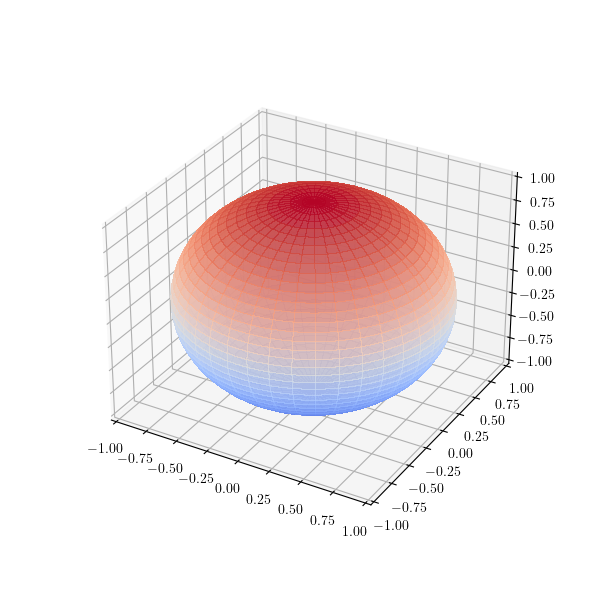

In [10]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(6,6))
    ax = fig.add_subplot(projection="3d")
    plt.ion()
    
    # Make data.
    x = np.linspace(0, 2*np.pi,80)
    y = np.linspace(0, np.pi,40)
    x, y = np.meshgrid(x, y)
    X = np.sin(y)*np.cos(x)
    Y = np.sin(y)*np.sin(x)
    Z = np.cos(y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0.2, antialiased=False,alpha=.8)
    for dim in 'xyz':
        getattr(ax, f'set_{dim}lim')([-1,1])
    
    return fig.canvas

a("Constant Distance")

####
<div style="padding-bottom: 40%"></div>

# Scalars and Vectors

A good first step when analyzing anything in this class, be it a problem, a theorem, a statement, an expression, is to take each component one at a time, and play the game _Is it a scalar or a vector?_

<div style="padding-bottom: 40%"></div>

<div style="padding-bottom: 40%"></div>

# Vectors

A **vector** in $\RR^n$ is a directed line segment $\overrightarrow{AB}$ between two points. 

Two vectors are considered the same if they have the same *magnitude* (length) and *direction*.

In [11]:
def plot_vector(v,ax, base=(0,0), **kwargs):
    """Plots a vector `v` with tail at the point `base` (defaults to origin) on the axes ax."""
    ax.arrow(base[0],base[1],v[0],v[1],length_includes_head=True,head_width=.2,**kwargs);

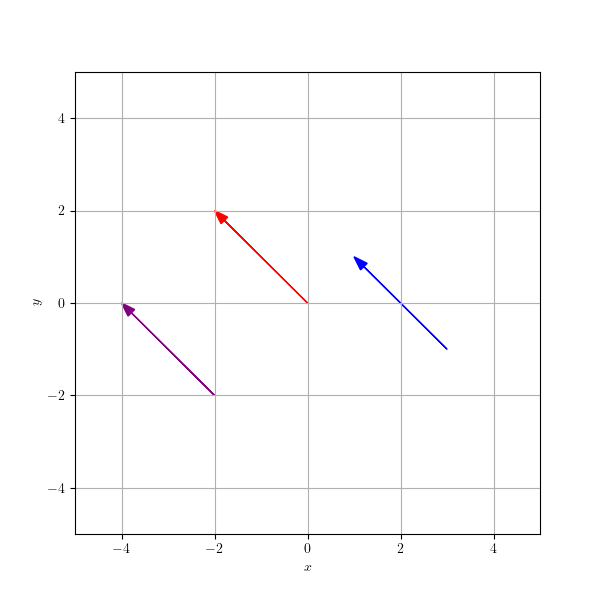

In [12]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    v = np.array([-2,2])
    w = np.array([3,-4])
    ax.set_xlim([-5,5])
    ax.set_ylim([-5,5])
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

    plot_vector(v,ax,color='r')
    plot_vector(v,ax,base=(3,-1),color='b')
    plot_vector(v,ax,base=(-2,-2),color='purple')
    ax.grid(True);
    
    return fig.canvas

a("A vector")

<p style="padding-bottom:40%;"> </p>

## Notation

We specify a vector by the displacement in each component. E.g., $$\vec v = \langle 3,1 \rangle = \bv{3 \\ 1}.$$

<div style="padding-bottom: 40%"></div>

<div class="alert alert-block alert-warning shadow"> 
<strong>Points vs Vectors</strong>

$(3,21)$ is a point. $\vec v = \langle 3,21\rangle$ is a vector. 

"21st St & 3rd Ave" is a location. "21 blocks north and 3 blocks west" is a displacement. 
</div>

<p style="padding-bottom:40%;"> </p>

# Vector Operations

The most important aspect of vectors is what you can do with/to them. In a sense their defining feature is that they can be **scaled** and **added together**.

Let $\vec v = \langle v_1, v_2, v_3 \rangle$.

### Magnitude

The **magnitude** of a vector $\vec v$ is a (nonnegative) scalar $|\vec v|$ (also written $\| \vec v \|$). 

$$|\vec v| = \sqrt{v_1^2 +v_2^2 + v_3^2}$$

<div style="padding-bottom: 40%"></div>

## Scalar multiplication

Let $c$ be a scalar. $$c\vec v = \langle c v_1, c v_2, c v_3\rangle$$

In [13]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    slider = FloatSlider(min=-2, max=2, step=.01, value=1)
    c = slider.value
    arrow = ax.arrow(0,0,3,1,color='b',head_width=.2,length_includes_head=True,lw=5)
    ax.arrow(0,0,1*3,1*1,color='g',head_width=.2,length_includes_head=True,lw=5)

    ax.set_xlim([-6,6])
    ax.set_ylim([-6,6])
    ax.grid(True)
    
    def update(change):
        c = slider.value
        ax.patches.pop()
        ax.arrow(0,0,c*3,c*1,color='g',head_width=.2,length_includes_head=True,lw=5)
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Scalar Multiplication")

# Short exercises

  1. Complete the identity $$|c\vec v| = $$ 
  2. Find a **unit vector** (a vector of length 1) in the direction of $\langle 3,12,-4 \rangle $.

<p style="padding-bottom:40%;"> </p>

## Vector addition

Let $\vec w = \langle w_1,w_2,w_3 \rangle$. $$\vec v + \vec w = \langle v_1 +w_1, v_2+w_2, v_3+w_3 \rangle$$

In [14]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    sliderA = FloatSlider(min=-3, max=1, step=.01, value=-1)
    sliderB = FloatSlider(min=-1, max=3, step=.01, value=1)
    
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    v = np.array((3,1))
    ax.grid(True)

    
    def update(change):
        ax.patches.clear()
        w = np.array((sliderA.value, sliderB.value))

        ax.arrow(0,0,v[0],v[1],color='b',head_width=.2,length_includes_head=True)
        ax.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True)
        ax.arrow(v[0],v[1],(w)[0],(w)[1],color="r",alpha=.3,head_width=.2,length_includes_head=True)
        ax.arrow(w[0],w[1],(v)[0],(v)[1],color="b",alpha=.3,head_width=.2,length_includes_head=True)
        ax.arrow(0,0,(v+w)[0],(v+w)[1],color="purple",alpha=1,head_width=.2,length_includes_head=True)
    
    update({})
    
    sliderA.observe(update, names='value')
    sliderB.observe(update, names='value')

    return VBox([sliderA, sliderB, fig.canvas])

a("Vector Addition")

<p style="padding-bottom:40%;"> </p>

# Linear combinations

A **linear combination** of vectors $\vec v$ and $\vec w$ is a vector $$a\vec v + b \vec w$$where $a$ and $b$ are arbitrary scalars. 

In [15]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE, figsize=(8, 8))
    plt.ion()
    
    sliderA = FloatSlider(min=-3, max=1, step=.01, value=-1)
    sliderB = FloatSlider(min=-3, max=3, step=.01, value=1)
    
    V = Checkbox(value=True, description=r"$\vec{v}$")     
    W = Checkbox(value=True, description=r"$\vec{w}$")

    add = Checkbox(value=False, description=r"sum")     
    diff = Checkbox(value=False, description=r"diff") 
    
    avg = Checkbox(value=False, description=r"average")
    wtd_avg = Checkbox(value=False, description=r"wtd avg")
    
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    v = np.array((3,1))
    ax.grid(True)

    
    def update(change):
        ax.patches.clear()
        w = np.array((sliderA.value, sliderB.value))
    
        if V.value:
            ax.arrow(0,0,v[0],v[1],color='b',lw=4, label=r"$\vec{v}$", head_width=.2,length_includes_head=True)
            ax.arrow(w[0],w[1],(v)[0],(v)[1],color="b",alpha=.3,head_width=.2,length_includes_head=True)


        if W.value:
            ax.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True,lw=4,label=r"$\vec{w}$")
            ax.arrow(v[0],v[1],(w)[0],(w)[1],color="r",alpha=.3,head_width=.2,length_includes_head=True)

        if add.value:
            plot_vector(v + w,ax,color='purple', label=r"$\vec v + \vec{w}$")
        
        if diff.value:
            plot_vector(v - w,ax,color='orange', base=w,label=r"$\vec{v} - \vec{w}$")

        if avg.value:
            plot_vector(v/2 + w/2,ax,color='green', label=r"$\frac{\vec v + \vec{w}}{2}$")

        if wtd_avg.value:
            plot_vector(v/4 + 3*w/4,ax,color='yellow', label=r"$\frac14 \vec{v} + \frac34 \vec{w}$")
        ax.legend(fontsize=24);

    
    update({})
    
    for widge in [sliderA, sliderB, V, W, add, diff, avg, wtd_avg]:
        widge.observe(update, names='value')
    
    return VBox([sliderA, sliderB, HBox([V, W, add, diff, avg, wtd_avg], box_style="warning"), fig.canvas])

a("Linear Combinations")

<p style="padding-bottom:40%;"> </p>

#### Exercise

Where would $2\vec v - 1\vec w$ be on this plot? 

$3 \vec v - 2 \vec w$? 

In [16]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE, figsize=(8, 8))
    plt.ion()
    
    sliderA = FloatSlider(min=-3, max=1, step=.01, value=-1)
    sliderB = FloatSlider(min=-3, max=3, step=.01, value=1)
    
    V = Checkbox(value=True, description=r"$\vec{v}$")     
    W = Checkbox(value=True, description=r"$\vec{w}$")

    ans1 = Checkbox(value=False, description="answer 1")     
    ans2 = Checkbox(value=False, description=r"answer 2") 
    
    ax.set_xlim(-4,12)
    ax.set_ylim(-4,12)
    v = np.array((3,1))
    ax.grid(True)

    
    def update(change):
        ax.patches.clear()
        w = np.array((sliderA.value, sliderB.value))
    
        if V.value:
            ax.arrow(0,0,v[0],v[1],color='b',lw=4, label=r"$\vec{v}$", head_width=.2,length_includes_head=True)
            ax.arrow(w[0],w[1],(v)[0],(v)[1],color="b",alpha=.3,head_width=.2,length_includes_head=True)


        if W.value:
            ax.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True,lw=4,label=r"$\vec{w}$")
            ax.arrow(v[0],v[1],(w)[0],(w)[1],color="r",alpha=.3,head_width=.2,length_includes_head=True)

        if ans1.value:
            plot_vector(2*v - w,ax,color='cyan',label=r"$2\vec v - \vec{w}$")

        if ans2.value:
            plot_vector(3*v - 2*w,ax,color='orange', label=r"$3\vec{v} - 2\vec{w}$")
        ax.legend(fontsize=24);

    
    update({})
    
    for widge in [sliderA, sliderB, V, W, ans1, ans2]:
        widge.observe(update, names='value')
    
    return VBox([sliderA, sliderB, HBox([V, W, ans1, ans2], box_style="warning"), fig.canvas])

a("Linear Combinations Example")

<p style="padding-bottom:40%;"> </p>

<div class="alert alert-block alert-info shadow"> 
    
<strong>Definition</strong>
    
<p>A <strong>convex combination</strong> of vectors $\vec v$ and $\vec w$ has the form $$(1-t) \vec v + t \vec w$$ for some scalar $t \in [0, 1]$.</p>
</div>



<p style="padding-bottom:40%;"> </p>

#### Exercise

What linear combination is this? $$ .25 \vec h + .25\vec q + .3 \vec m + .2 \vec f$$
  

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

<div style="padding-bottom: 40%"></div>

<div style="padding-bottom: 40%"></div>

# Addenda

A few miscellaneous points about scalars and vectors. 

  - The magnitude $|\vec v|$ pf a vector can, in various contexts, be called the _length_, _norm_, _modulus_, _amplitude_, or _size_ of a vector. 
  - A **unit vector** $\vec u$ is a vector with magnitude $|\vec u| = 1$. I've heard this called a _pure direction_.
  - Any nonzero vector $\vec v$ can be transformed into a unit vector with the same direction by scaling. To wit: $$\vec u = \frac{\vec v}{|\vec v|} $$ is a unit vector for all $\vec v \neq \vec 0$. This process is called **normalization**.
  - $\vec 0$ is a vector. 

<div style="padding-bottom: 40%"></div>

## Questions

  - How would you describe "the set of all unit vectors"?
  - If $\vec a$ represents a position in space and $r$ is a positive scalar, what is the set of $\vec x$ such that $$|\vec x - \vec a| = r?$$

<div style="padding-bottom: 40%"></div>

# Next time

Can we multiply vectors?